<a href="https://colab.research.google.com/github/eyataarit/ML/blob/main/Email_Spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Description : program detects if email is spam (1) or not (0)

In [ ]:
import numpy as np 
import pandas as pd
import nltk 
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import string
import matplotlib.pyplot as plt

Load Data

In [ ]:
# Load Data
from google.colab import files 
files = files.upload()

Saving emails.csv to emails.csv


Read csv file


Explore the data

In [ ]:
df = pd.read_csv('emails.csv')
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [ ]:
df.shape

(5728, 2)

In [ ]:
 df.columns

Index(['text', 'spam'], dtype='object')

Text(0, 0.5, 'Number of emails')

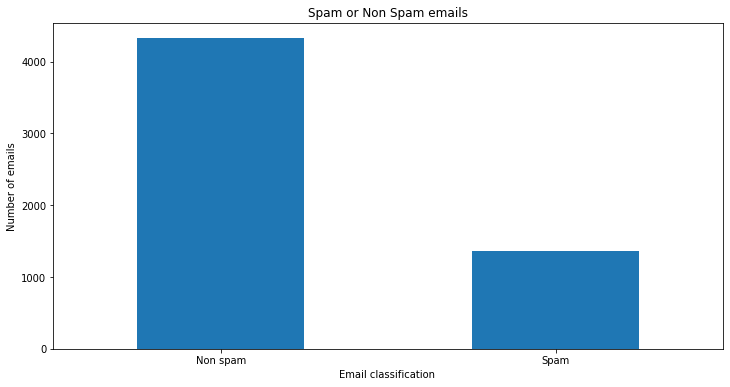

In [ ]:
df['spam'].value_counts().plot(kind='bar',figsize=(12,6))
plt.xticks(np.arange(2),('Non spam','Spam'),rotation=0)
plt.title('Spam or Non Spam emails')
plt.xlabel('Email classification ')
plt.ylabel('Number of emails')

Check for duplicates and remove them





In [ ]:
df.drop_duplicates(inplace= True)
df.shape

(5695, 2)

Check Missing data : ( NAN, NaN, na )

In [ ]:
df.isnull().sum()

text    0
spam    0
dtype: int64

 Download the stopwords package

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Function to process the text that remove the punctuation, remove stopwords (useless data) and then return a list of clean text words


In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def process_text(text):
  nonpunc = [char for char in text if char not in string.punctuation]
  nonpunc = ''.join(nonpunc)
  
  clean_words = [word for word in nonpunc.split() if word.lower() not in stopwords.words('english')]

  return clean_words


Show all the tokenization ( list of tokens : lemmas ) 

In [ ]:
df['text'].head()

0    Subject: naturally irresistible your corporate...
1    Subject: the stock trading gunslinger  fanny i...
2    Subject: unbelievable new homes made easy  im ...
3    Subject: 4 color printing special  request add...
4    Subject: do not have money , get software cds ...
Name: text, dtype: object

In [ ]:
df['text'].head().apply(process_text)

0    [Subject, naturally, irresistible, corporate, ...
1    [Subject, stock, trading, gunslinger, fanny, m...
2    [Subject, unbelievable, new, homes, made, easy...
3    [Subject, 4, color, printing, special, request...
4    [Subject, money, get, software, cds, software,...
Name: text, dtype: object

Let's try this example, which will explain the process of the work later. 


In [ ]:
msg = 'hey world hey hey hey playing'
msg2 ='test test test test one hey play'
print(msg)
print()


hey world hey hey hey playing



In [ ]:
#convert text to matrix of token counts 
#bow = bag of words
# (0,0) 4 ==> in th 0st element of the list (msg) , the word was repeated 4 times 
#(indice of the element in the list ,  .. )   occurence 
bow = CountVectorizer(analyzer=process_text).fit_transform([[msg],[msg2]])
print (bow) 

  (0, 0)	4
  (0, 5)	1
  (0, 3)	1
  (1, 0)	1
  (1, 4)	4
  (1, 1)	1
  (1, 2)	1


In [ ]:
bow.shape
#that means (number of elements, number of unique words )

(2, 6)

Convert a collection of text to a matrix of tokens

In [ ]:
emails_bow = CountVectorizer(analyzer=process_text).fit_transform(df['text']) 

Split data into 20% test and 80% training 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train,Y_test = train_test_split(emails_bow, df['spam'],test_size=0.20,random_state=0)


In [ ]:
print(' test set: ' + str(X_test.shape))
print(' train set: ' + str(X_train.shape))

 test set: (1139, 37229)
 train set: (4556, 37229)


In [ ]:
emails_bow.shape

(5695, 37229)

Create and train the Naive Bayes CLassifier

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB().fit(X_train, Y_train)

In [ ]:
print(classifier.predict(X_train))

[0 0 0 ... 0 0 0]


In [ ]:
print(Y_train.values)

[0 0 0 ... 0 0 0]


Evaluation of the model on the training data


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = classifier.predict(X_train)
print(classification_report(Y_train,pred))
print('Confusion Matrix : \n ', confusion_matrix(Y_train,pred))
print ('Accuracy : ', accuracy_score(Y_train,pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3457
           1       0.99      1.00      0.99      1099

    accuracy                           1.00      4556
   macro avg       0.99      1.00      1.00      4556
weighted avg       1.00      1.00      1.00      4556

Confusion Matrix : 
  [[3445   12]
 [   1 1098]]
Accuracy :  0.9971466198419666


Predict the test data

In [ ]:
print(classifier.predict(X_test))
print(Y_test.values)

[1 0 0 ... 0 0 0]
[1 0 0 ... 0 0 0]


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = classifier.predict(X_test)
print(classification_report(Y_test,pred))
print('Confusion Matrix : \n ', confusion_matrix(Y_test,pred))
print ('Accuracy : ', accuracy_score(Y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       870
           1       0.97      1.00      0.98       269

    accuracy                           0.99      1139
   macro avg       0.98      0.99      0.99      1139
weighted avg       0.99      0.99      0.99      1139

Confusion Matrix : 
  [[862   8]
 [  1 268]]
Accuracy :  0.9920983318700615
